In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import (
    train_test_split
    , GridSearchCV
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load and prepare data
housing = fetch_california_housing()
X = pd.DataFrame(housing.data
                 , columns=housing.feature_names
                )
y = housing.target

print(X.shape, y.shape)

(20640, 8) (20640,)


In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y
    , test_size=0.2
    , random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Define parameter grid
param_grid = {
    'alpha': np.logspace(-4, 1, 20),  # [0.0001, 0.001, ..., 10]
    'l1_ratio': np.linspace(0.1, 1, 10) # [0.1, 0.2, ..., 1.0]
}

# Initialize ElasticNet
elastic_net = ElasticNet(
    max_iter=1000
    , random_state=42
)

In [29]:
# Define parameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.005, 0.009, 0.01, 0.05, 0.1, 0.5, 1.0]
    , 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Initialize ElasticNet
elastic_net = ElasticNet(
    max_iter=1000
    , random_state=42
)

In [6]:
# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=elastic_net
    , param_grid=param_grid
    , cv=5
    , scoring='neg_mean_squared_error'
    #, n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_mean_squared_error')

In [7]:
# Get best parameters and score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params

{'alpha': 0.0006158482110660267, 'l1_ratio': 1.0}

In [8]:
# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Output best parameters and scores
print(f"Best Parameters: {best_params}")
print(f"Best MSE: {-grid_search.best_score_:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R2 Score: {r2:.4f}")

Best Parameters: {'alpha': 0.0006158482110660267, 'l1_ratio': 1.0}
Best MSE: 0.5192
Test MSE: 0.5550
Test R2 Score: 0.5765


In [9]:
# Create results DataFrame for visualization
results = pd.DataFrame(grid_search.cv_results_)
pivot_results = results.pivot(
    index='param_alpha'
    , columns='param_l1_ratio'
    , values='mean_test_score'
)

results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024705,0.011462,0.000275,0.000070,0.0001,0.1,"{'alpha': 0.0001, 'l1_ratio': 0.1}",-0.520076,-0.502296,-0.520559,-0.507894,-0.545498,-0.519265,0.014884,42
1,0.018420,0.000652,0.000222,0.000085,0.0001,0.2,"{'alpha': 0.0001, 'l1_ratio': 0.2}",-0.520077,-0.502296,-0.520559,-0.507893,-0.545494,-0.519264,0.014884,40
2,0.017288,0.000332,0.000165,0.000007,0.0001,0.3,"{'alpha': 0.0001, 'l1_ratio': 0.30000000000000...",-0.520079,-0.502296,-0.520558,-0.507891,-0.545491,-0.519263,0.014883,38
3,0.016661,0.000222,0.000154,0.000007,0.0001,0.4,"{'alpha': 0.0001, 'l1_ratio': 0.4}",-0.520081,-0.502296,-0.520558,-0.507889,-0.545488,-0.519262,0.014882,35
4,0.016320,0.000307,0.000157,0.000006,0.0001,0.5,"{'alpha': 0.0001, 'l1_ratio': 0.5}",-0.520082,-0.502296,-0.520557,-0.507888,-0.545485,-0.519262,0.014881,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.001006,0.000038,0.000162,0.000024,10.0,0.6,"{'alpha': 10.0, 'l1_ratio': 0.6}",-1.369517,-1.297899,-1.346615,-1.306115,-1.364502,-1.336930,0.029627,167
196,0.001039,0.000048,0.000153,0.000009,10.0,0.7,"{'alpha': 10.0, 'l1_ratio': 0.7000000000000001}",-1.369517,-1.297899,-1.346615,-1.306115,-1.364502,-1.336930,0.029627,167
197,0.001048,0.000048,0.000159,0.000005,10.0,0.8,"{'alpha': 10.0, 'l1_ratio': 0.8}",-1.369517,-1.297899,-1.346615,-1.306115,-1.364502,-1.336930,0.029627,167
198,0.000999,0.000030,0.000154,0.000006,10.0,0.9,"{'alpha': 10.0, 'l1_ratio': 0.9}",-1.369517,-1.297899,-1.346615,-1.306115,-1.364502,-1.336930,0.029627,167


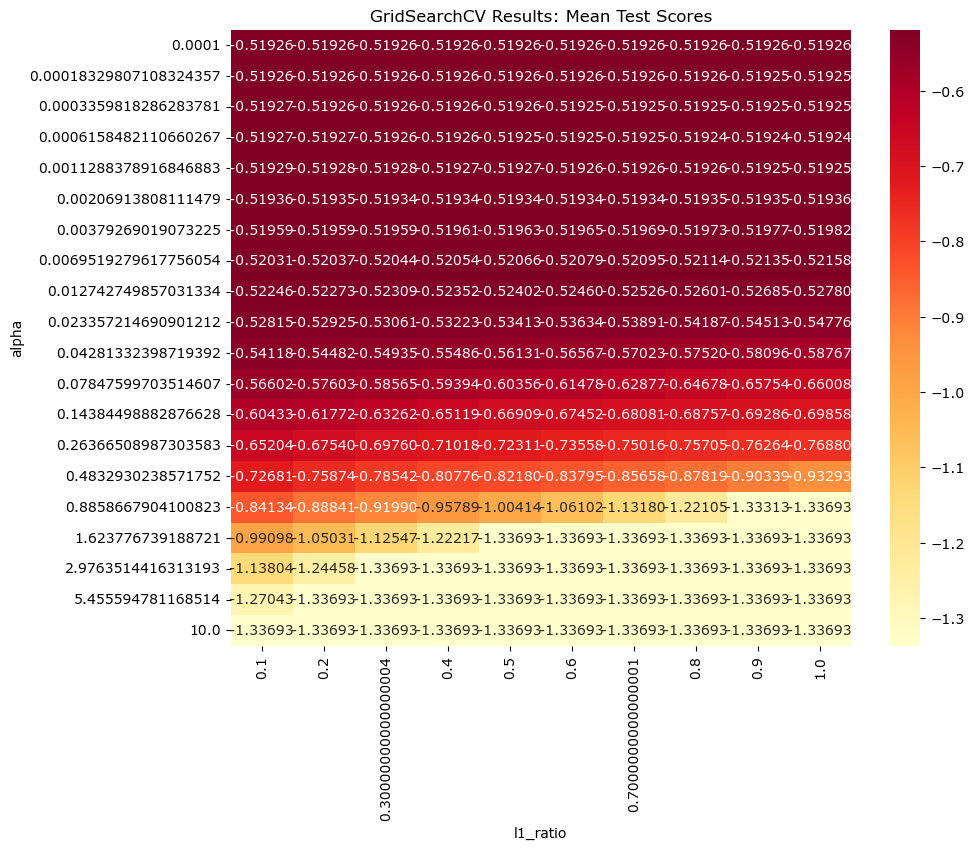

In [11]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot_results
    , annot=True
    , cmap='YlOrRd'
    , fmt='.5f'
)
plt.title('GridSearchCV Results: Mean Test Scores')
plt.xlabel('l1_ratio')
plt.ylabel('alpha')
plt.show()

In [61]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

    # Calculate mean of target variable
mean_y = np.mean(y_test)

# Scaled RMSE (Coefficient of Variation of RMSE)
rmse_ratio = rmse / mean_y

print(f"Model Evaluation Results:")
print(f"-------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"RMSE as % of Mean Target (CV(RMSE)): {rmse_ratio * 100:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R²): {r2:.3f}")

Model Evaluation Results:
-------------------------
Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.74
RMSE as % of Mean Target (CV(RMSE)): 36.25%
Mean Absolute Error (MAE): 0.53
R-Squared (R²): 0.576
